# Dijkstra's Algorithm
## Algorithm
### Initialization
1. **Set up the graph** and initialize a list called **visitedStack** to store the shortest known distances to each node, setting all to a very large number (effectively infinity), except the start vertex which is set to 0.
2. **Initialize a traversal queue** as empty.
3. **Add the start vertex** to the traversal queue with distance 0.
### Main Loop
4. While the traversal queue is not empty:
    - Remove the first element from the queue to get the current vertex and its distance.
    - For each neighbor of the current vertex:
        - Get the edge weight between current vertex and neighbor.
        - Calculate the total distance from the start vertex to the neighbor using this edge.
        - If the edge exists (weight > 0) and the new total distance is less than the previously recorded distance for the neighbor in **visitedStack**:
            - Update the neighbor’s entry in **visitedStack** with the new distance.
            - Add the neighbor and its new distance to the end of the traversal queue.
### Termination
- 5. When the queue is empty, return **visitedStack**, which now holds the shortest distance from the start vertex to all other vertices.
***
**Note:** Dijkstra's algorithm doesn't work for directed graphs, i.e, graphs with negative edges because it relies on the assumption that once a node is visited with the current shortest path estimate, its shortest distance cannot be reduced any further. This assumption fails in graphs with negative edges.
## Why Dijkstra’s Fails with Negative Edges?
### Greedy Nature and Incorrect Finalization
- Dijkstra’s algorithm selects nodes in order of increasing distance from the source, finalizing each node as its shortest distance when it is first processed.
- If a shorter path with a negative edge exists via an unvisited node, Dijkstra's algorithm will not revisit the already processed node to update its distance.
- This can lead to incorrect shortest paths, as a path using negative edges can offer a net reduction in the total path cost after the node is **finalized**.
***
## Initializing the graph

In [1]:
graph = [
    (0, 1, 4),
    (1, 2, 2),
    (0, 2, 4),
    (2, 3, 3),
    (2, 4, 1),
    (3, 5, 2),
    (4, 5, 3),
    (2, 5, 6)
]

## Function to convert edge-list to adjancency-matrix

In [2]:
def edge_list_to_adjacency_matrix(edge_list, directed=False):
    # get number of vertices
    s = set()
    for i in edge_list:
        s.add(i[0]); s.add(i[1])
    num_vertices = len(s)
    s = list(s)
    # Initialize an n x n matrix with all 0's
    adj_matrix = [[0 for _ in range(num_vertices)] for _ in range(num_vertices)]
    
    # Iterate through each edge in the edge list
    for edge in edge_list:
        u, v = edge[:2]  # Get the vertices of the edge
        adj_matrix[s.index(u)][s.index(v)] = edge[2]  # Mark edge u -> v with 1 (or edge weight if any)
        
        if not directed:
            adj_matrix[s.index(v)][s.index(u)] = edge[2]  # For undirected graphs, also mark edge v -> u
        else: adj_matrix[s.index(v)][s.index(u)] = -edge[2]
    
    return adj_matrix

## Visualizing the graph

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Defining a Class 
class GraphVisualization: 

    def __init__(self, weighted, edge_list = [], adjacency_matrix = [], isDirected = False, useAlphabets = False): 
        self.weighted = weighted
        self.G = (nx.DiGraph() if isDirected else nx.Graph())
        
        if len(edge_list) > 0:
            for i in edge_list:
                self.G.add_edge(i[0], i[1], weight = i[2])
        
        elif len(adjacency_matrix) > 0:
            for i in range(len(adjacency_matrix)):
                for j in range(len(adjacency_matrix[i])):
                    if adjacency_matrix[i][j] <= 0: continue
                    if useAlphabets:
                        self.G.add_edge(chr(i+97), chr(j+97), weight = adjacency_matrix[i][j])
                    else: self.G.add_edge(i, j, weight = adjacency_matrix[i][j])
        
        elif len(edge_list) == 0 and len(adjancency_matrix) == 0:
            raise Exception("I expect atleast an edge-list or an adjancency matrix")
    
    # In visualize function G is an object of 
    # class Graph given by networkx G.add_edges_from(visual) 
    # creates a graph with a given list 
    # nx.draw_networkx(G) - plots the graph 
    # plt.show() - displays the graph 
    def visualize(self):
        pos = nx.spring_layout(self.G, scale = 5000)

        # Manually scale up the positions for more spacing
        for key in pos:
            pos[key] *= 10000
        nx.draw_networkx(self.G, pos, node_size=700, node_color='#00ccff', font_size=10)

        if self.weighted:
            # Draw edge labels for weights
            labels = nx.get_edge_attributes(self.G, 'weight')
            nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        plt.show()

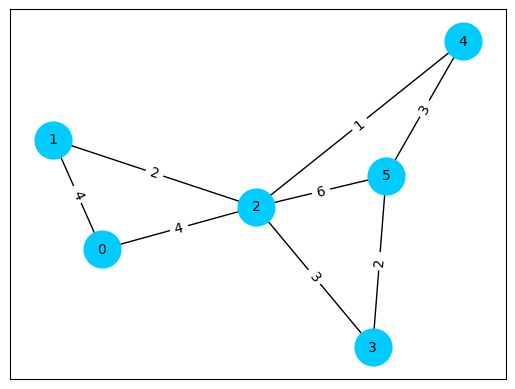

In [4]:
adjancency_matrix_ = edge_list_to_adjacency_matrix(graph)
G = GraphVisualization(weighted = True, isDirected = False, adjacency_matrix = adjancency_matrix_, useAlphabets = False)
G.visualize()

***
## Implementing Dijkstra's Algorithm
In this example, we're using priority queue to store the order of traversal, however, we can also use set for the same.

In [5]:
import heapq
from typing import List

VERY_LARGE_NUMBER = 10 ** 6

class Traversal:
    def __init__(self, graph_:List[List[int]]):
        self.graph = graph_  # assuming the reference is never going to change, we do a shallow copy
        self.visitedStack = [VERY_LARGE_NUMBER for i in graph_]
        self.traversalQueue = []

    def BFS(self, startVertex = 0):
        self.traversalQueue.append((0, startVertex))
        self.visitedStack[startVertex] = 0
        while len(self.traversalQueue) > 0:
            dist, vertex = heapq.heappop(self.traversalQueue)
            for i in range(len(self.visitedStack)):
                edge = self.graph[vertex][i]
                totalDist = edge + dist
                if edge > 0 and totalDist < self.visitedStack[i]:
                    self.visitedStack[i] = totalDist
                    heapq.heappush(self.traversalQueue,(totalDist, i))
        
        return self.visitedStack

## Driver code

In [6]:
sourceVertex = 0
adjancency_matrix_ = edge_list_to_adjacency_matrix(graph)
t = Traversal(adjancency_matrix_)
distanceVector = t.BFS(sourceVertex)

for i in range(len(distanceVector)):
    print(f"Minimum distance between {sourceVertex} and {i} = {distanceVector[i]}")

Minimum distance between 0 and 0 = 0
Minimum distance between 0 and 1 = 4
Minimum distance between 0 and 2 = 4
Minimum distance between 0 and 3 = 7
Minimum distance between 0 and 4 = 5
Minimum distance between 0 and 5 = 8


***